# Ford GoBike Dataset

## by Bnina Ayoub

## Introduction

This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime
import time
%matplotlib inline

In [2]:
# Creating a copy from the original dataframe
df_orig = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
print(df_orig.shape)
print(df_orig.info())

(183412, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  floa

In [4]:
df_orig.sample(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
22594,467,2019-02-26 07:36:57.2260,2019-02-26 07:44:44.2870,16.0,Steuart St at Market St,37.794130,-122.394430,50.0,2nd St at Townsend St,37.780526,-122.390288,1843,Subscriber,1970.0,Male,No
174983,338,2019-02-02 16:00:50.2160,2019-02-02 16:06:29.0010,243.0,Bancroft Way at College Ave,37.869360,-122.254337,269.0,Telegraph Ave at Carleton St,37.862320,-122.258801,1770,Subscriber,1994.0,Female,Yes
159213,915,2019-02-05 18:03:38.6340,2019-02-05 18:18:53.8500,183.0,Telegraph Ave at 19th St,37.808702,-122.269927,210.0,45th St at Manila,37.833294,-122.256224,3609,Subscriber,1981.0,Male,No
59065,275,2019-02-20 21:22:28.0850,2019-02-20 21:27:03.5170,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,368.0,Myrtle St at Polk St,37.785434,-122.419622,6463,Subscriber,1992.0,Male,No
178212,520,2019-02-01 17:35:27.1440,2019-02-01 17:44:07.6770,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,114.0,Rhode Island St at 17th St,37.764478,-122.402570,3675,Subscriber,1966.0,Female,No


In [5]:
# Checking Null values
df_orig.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

# Cleaning 

In [6]:
# Creating a copy from theoriginal dataframe
df = df_orig.copy()

In [7]:
# Fixing erraneous data type for `start_time` and `end_time` columns
df.start_time = pd.to_datetime(df.start_time, format = "%Y-%m-%d %H:%M:%S")
df.end_time = pd.to_datetime(df.end_time, format ="%Y-%m-%d %H:%M:%S")

In [8]:
# Recalculating duration_sec for any miscalculated records
df.duration_sec = (df.end_time - df.start_time).dt.total_seconds()

In [9]:
# Converting duration_sec to integer
df.duration_sec = df.duration_sec.astype(int)

In [10]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [11]:
# Replacing member_birth_year NaN values by 0 in order to make the conversion to integer possible
df.member_birth_year.replace(np.nan, 0, inplace = True )

In [12]:
df.member_birth_year.isna().sum()

0

In [13]:
# Fixing erraneous data type for `member_birth_year`
df.member_birth_year = df.member_birth_year.astype(int)
df.member_birth_year

0         1984
1            0
2         1972
3         1989
4         1974
          ... 
183407    1996
183408    1984
183409    1990
183410    1988
183411    1989
Name: member_birth_year, Length: 183412, dtype: int32

In [14]:
# Creating the age column based on the member_birth_year
now = datetime.now().year
df['age'] = now - df.member_birth_year

In [15]:
# Replacing all 0 to NaN so they'll be ignored when plotting
df.member_birth_year.replace(0, np.nan, inplace = True )

In [16]:
df.age.unique()

array([  38, 2022,   50,   33,   48,   63,   39,   34,   30,   26,   29,
         32,   41,   47,   44,   31,   25,   36,   22,   40,   27,   42,
         49,   37,   51,   43,   55,   24,   28,   45,   23,   35,   53,
         59,   46,   58,   57,   61,   54,   56,   60,   68,   64,   62,
         52,   66,   65,   77,  122,   70,   74,   71,   81,   72,   73,
         69,   67,   76,   75,   91,   79,   80,  102,   89,   21,  144,
        121,   78,   94,   88,   83,   92,  120,  112,   84,   95])

In [17]:
# Cleaning invalid values for age column
df = df.query("age < 100")

In [18]:
# Imputing the member_gender's NaN values with the mode
mode = df.member_gender.mode()[0]
df.member_gender.fillna(mode, inplace = True)
df.member_gender.isna().sum()

0

In [19]:
df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip', 'age'],
      dtype='object')

In [20]:
# Creating day and month column based on the start_time column
df['day'] = df.start_time.dt.strftime('%a')

In [21]:
# Creating age decade column for visualization
bin_edges = [20, 29, 39, 49, 59, 69, 79, 89, 95]
bin_names = ['20s', '30s', '40s', '50s', '60s', '70s', '80s', '90s']
df['age_decade'] = pd.cut(df['age'], bin_edges, labels=bin_names)
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,day,age_decade
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,38,Thu,30s
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,50,Thu,50s
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,33,Thu,30s
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,48,Thu,40s
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,63,Thu,60s


In [22]:
# Dropping unuseful columns
df.drop(['end_time', 'start_station_id', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id'], axis = 1 , inplace = True)

In [23]:
df.isna().sum()

duration_sec                 0
start_time                   0
start_station_name         195
start_station_latitude       0
start_station_longitude      0
user_type                    0
member_birth_year            0
member_gender                0
bike_share_for_all_trip      0
age                          0
day                          0
age_decade                   0
dtype: int64

In [58]:
def bins(df, col, k):
    return np.arange(df[col].min(), df[col].max() + k, k)

### What is the structure of your dataset?

This dataset includes 183412 record and has 16 features.

### What is/are the main feature(s) of interest in your dataset? `(incomplete)`

The main features are `duration_sec` `start_station_name` `` `user_type` `member_birth_year` `member_gender`

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The `member_birth_year`, `member_gender`, `start_time` and  `duration_sec` are the features that will help the most to support my investigation

## Univariate Exploration

In [25]:
# Getting the base color
base_color = sb.color_palette()[0]

### **Question 1 :**

**When are most trips taken in terms of days ?**

**Visualization :**

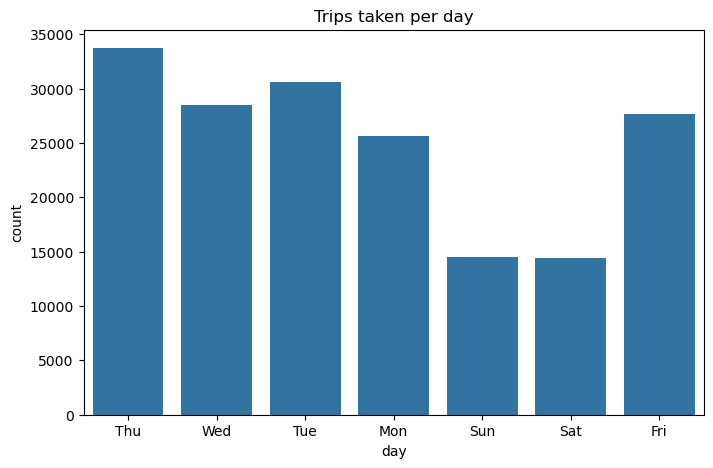

In [26]:
plt.figure(figsize = (8,5))
sb.countplot(data = df, x='day', color = base_color)
plt.title('Trips taken per day');

**Observation :**

***We notice that the fewest trips taken were at weekends and the most are taken on thursday***

### **Question 2 :**

**Which gender is often take trips ?**

**Visualization :**

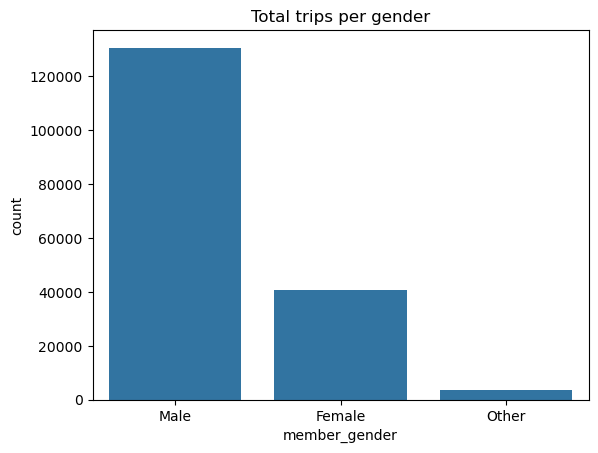

In [27]:
sb.countplot(data = df, x = 'member_gender', color = base_color, order = df.member_gender.value_counts().index)
plt.title('Total trips per gender');

**Observation :**

***We observe that male have a high rate difference comparing to female and other***

### **Question 3 :**
**How are latitude and longitude distributed ?**

**Visualization :**

In [28]:
print(df.start_station_latitude.describe())
print(df.start_station_longitude.describe())

count    175072.000000
mean         37.770800
std           0.101088
min          37.317298
25%          37.770326
50%          37.780760
75%          37.797320
max          37.880222
Name: start_station_latitude, dtype: float64
count    175072.000000
mean       -122.351303
std           0.118468
min        -122.453704
25%        -122.411901
50%        -122.398279
75%        -122.283093
max        -121.874119
Name: start_station_longitude, dtype: float64


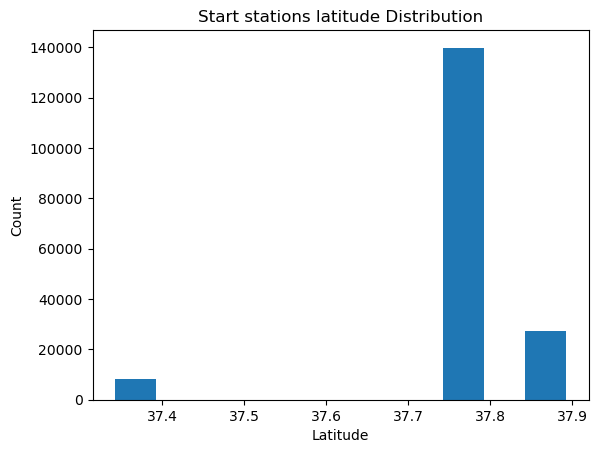

In [59]:
binx = bins(df,'start_station_latitude', 0.1)
plt.hist(data = df, x='start_station_latitude', bins = binx, rwidth = 0.5);
plt.title('Start stations latitude Distribution')
plt.xlabel('Latitude')
plt.ylabel('Count');

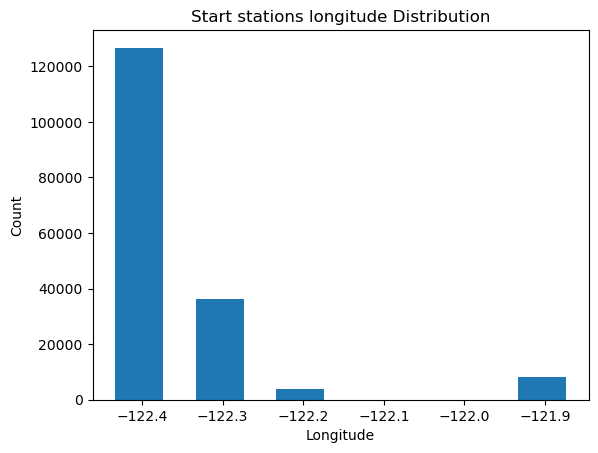

In [60]:
binx = bins(df, 'start_station_longitude',0.1)
plt.hist(data = df, x='start_station_longitude', bins = binx, rwidth = 0.6);
plt.title('Start stations longitude Distribution');
plt.xlabel('Longitude')
plt.ylabel('Count');

**Observation :**

***Based on the above plots we notice that all latitude values are positive (around 37° degree) and all longitude values are negative (from -121.9° to -122.4°)***

### **Question 4 :**

**How are trips duration distributed ?**

**Visualization :**

In [31]:
np.log10(df.duration_sec).describe()

count    175072.000000
mean          2.707925
std           0.305267
min           1.785330
25%           2.509203
50%           2.707570
75%           2.897077
max           4.927103
Name: duration_sec, dtype: float64

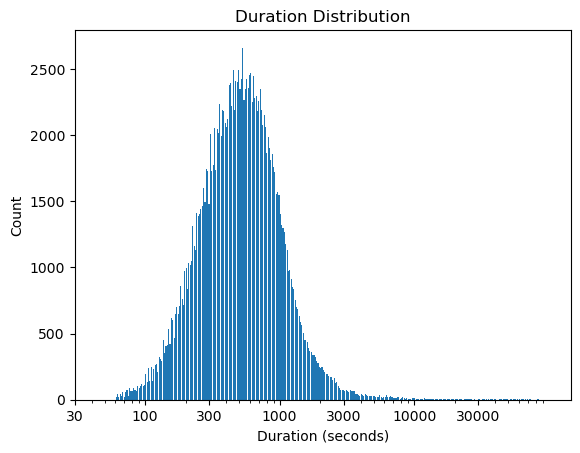

In [32]:
binx = 10 ** np.arange(1.7, 5 + 0.01 , 0.01)
ticks = [30, 100, 300, 1000, 3000, 10000, 30000]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data = df, x = 'duration_sec',bins = binx, rwidth = 0.8)
plt.xscale('log')
plt.xlabel('Duration (seconds)')
plt.ylabel('Count')
plt.xticks(ticks, labels)
plt.title('Duration Distribution');

**Observation :**



***After performing the log scale we can see a histogram with normal distribution including a peak between 400 and 800***

### **Question 5 :**

**What is the age range that have the highest trip count rate ?**

**Visualization :**

(20.0, 80.0)

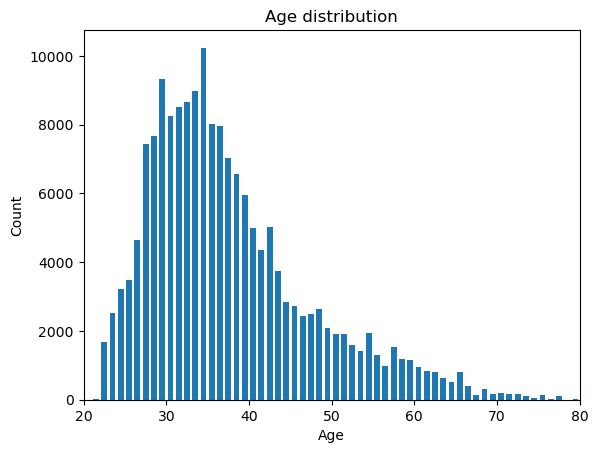

In [62]:
binx = bins(df , 'age', 1)
plt.hist(data = df, x= 'age', bins = binx, rwidth = 0.7);
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age distribution')
plt.xlim((20, 80))

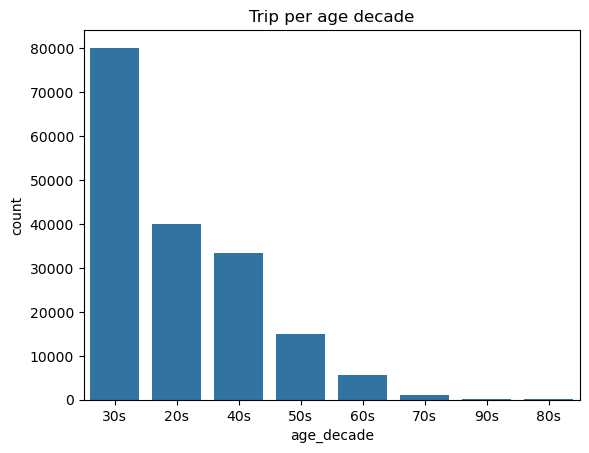

In [34]:
sb.countplot(data = df, x='age_decade', color = base_color, order = df.age_decade.value_counts().index)
plt.title('Trip per age decade');

**Observation :**

***- In the 1st plot we have a right skewed histogram with a peak between 25 and 35 values.***

***- The 2nd plot shows that most trip takers are tricenarians***

### **Question 6 :**

**Which user type have the most trip count**

**Visualization :**

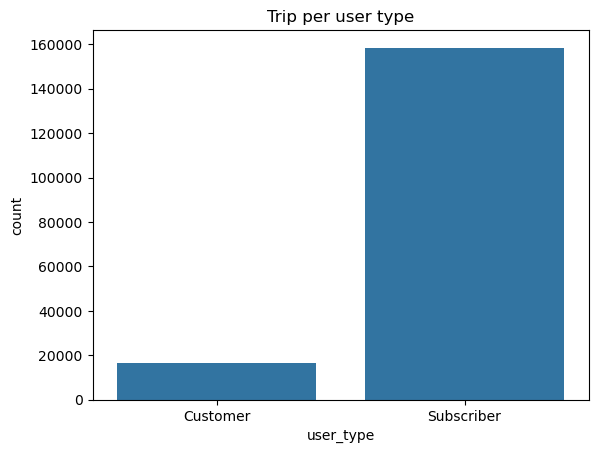

In [35]:
sb.countplot(data = df , x = 'user_type', color = base_color)
plt.title('Trip per user type');

**Observations :**

***As we can see Subscribers exceed the number of Customers with vast difference***

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

- Trips taken for each day of the week shows a nearly the same result except for the weekends, The most trip taken were on thursday.

- The `age` column contains some invalid records that i had to clean them, Most of the points falls between 25 and 35 which is reasonable.

- I performed a log scale on the `duration_sec` column due to large amount of points I got a histogram with a normal distribution.

- There is a wide difference between subscribed users and customers.

- I extracted a new feature `age_decade` from the `age` column to identify the age of most trip takers

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

- Based on the `start_time` column i created a new column `day` in order to plot trip counts for each day of the week.

- I created a new feature `age` extracted from the `member_birth_year` to help identify the age range for the trip takers.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

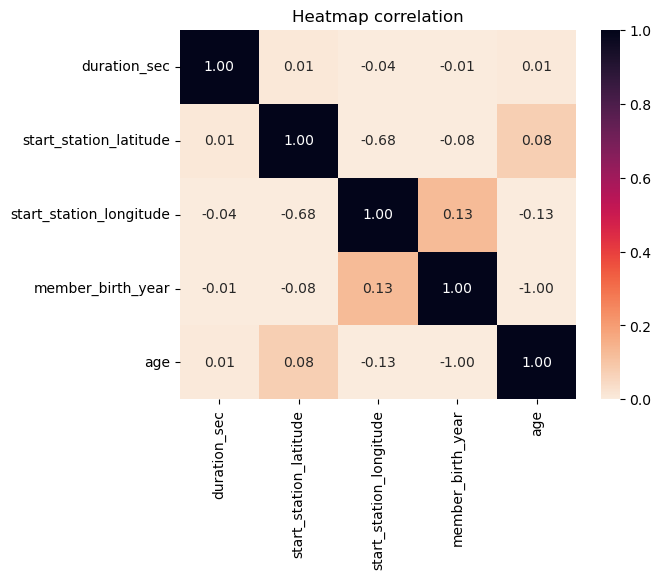

In [36]:
sb.heatmap(df.corr(), cmap = 'rocket_r', annot = True, fmt = '.2f', vmin = 0)
plt.title('Heatmap correlation');

### **Qusetion 1 :**

**In which country those trips are located**

**Visualization**

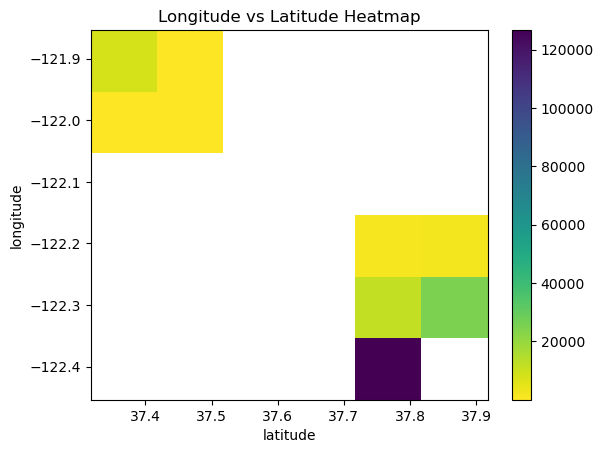

In [37]:
plt.hist2d(data = df, x = 'start_station_latitude', y = 'start_station_longitude', cmin = 0.5,
           cmap = 'viridis_r', bins = [bins_x, bins_y]);
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.title('Longitude vs Latitude Heatmap')
plt.colorbar();

**Observations**

***Refering to the coordinate system those coordination are located in california, San Francisco like mentioned in the inroduction***

### **Qusetion 2 :**

**What is the average duration for each age decade ?**

**Visualization**

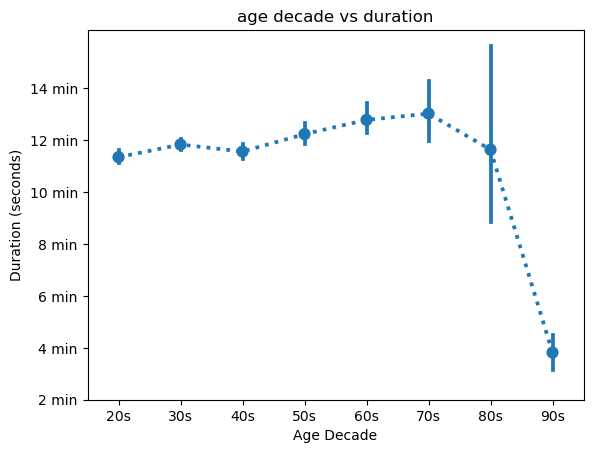

In [38]:
sb.pointplot(data = df, x = 'age_decade', y = 'duration_sec', linestyles = 'dotted');
plt.title('age decade vs duration')
ticks = [120, 240, 360, 480, 600, 720, 840]
labels = ['2 min', '4 min', '6 min', '8 min', '10 min', '12 min', '14 min']
plt.xlabel('Age Decade')
plt.ylabel('Duration (seconds)')
plt.yticks(ticks, labels);

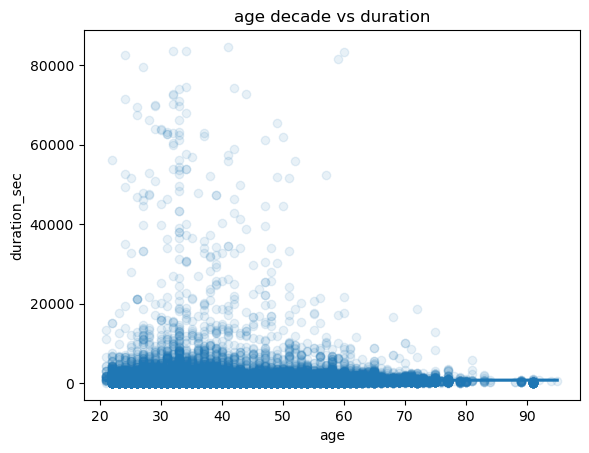

In [39]:
sb.regplot(data = df, x = 'age', y = 'duration_sec', scatter_kws = {'alpha':1/10});
plt.title('age decade vs duration');

**Observations**

***- We observe starting from 40s and above an increase in the duration rate then a drastical decrease at 70s***

***- Age and duration have a weak positive correlation based on the scatter plot***

### Question 3 :

**Which gender have the highest duration rate ?**

**Visualization**

In [40]:
gender_dur = df.groupby('member_gender', as_index = False)['duration_sec'].sum()

In [41]:
gender_dur

,member_gender,duration_sec
0,Female,31812598
1,Male,87840715
2,Other,3638547


Text(0.5, 1.0, 'Duration per Gender')

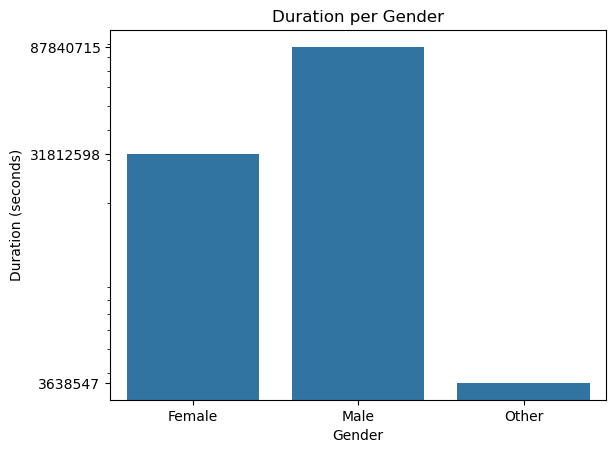

In [42]:
ticks = [3638547,31812598, 87840715]
labels = ['{}'.format(v) for v in ticks]
sb.barplot(data = gender_dur, y = 'duration_sec', x = 'member_gender', color = base_color)
plt.yscale('log')
plt.yticks(ticks, labels)
plt.xlabel('Gender')
plt.ylabel('Duration (seconds)')
plt.title('Duration per Gender')

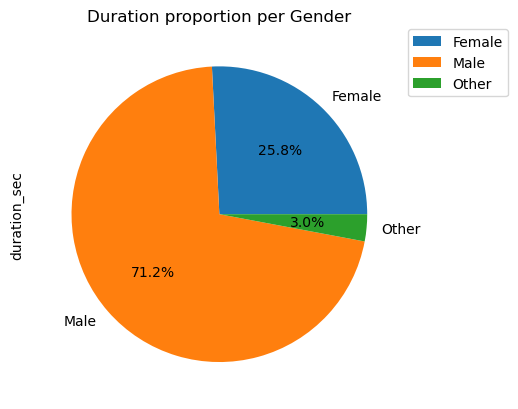

In [43]:
df.groupby(['member_gender']).sum().plot(kind='pie', y='duration_sec', autopct='%1.1f%%')
plt.title('Duration proportion per Gender')
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0) #Repositioning the legend

**Observations**

***Male have the highest count in terms of trip duration while other have the least count***

***Male's duration represents more than 70% comparing to the rest***

### Question  4 :

**Which gender have the highest trip count ?**

**Visualization**

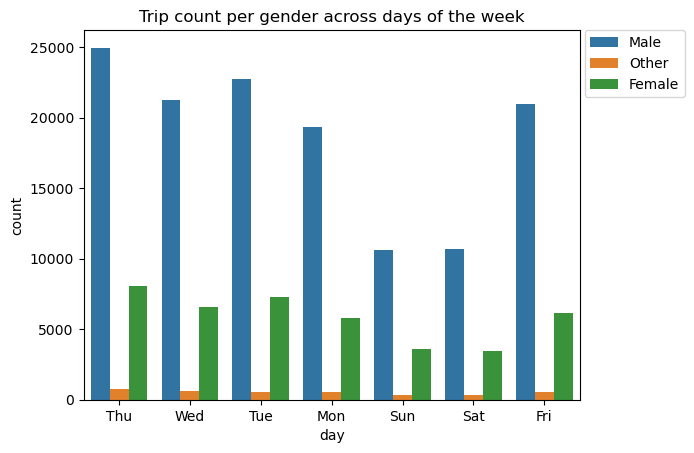

In [44]:
sb.countplot(data = df, x = 'day', hue = 'member_gender')
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0) #Repositioning the legend
plt.title('Trip count per gender across days of the week');

**Observations**

***Male trip rate is higher than female and other with a vast difference for each day*** 

### Question 5 :

**What are the top 10 stations that have the highest trip count?**

**Visualization**

In [45]:
# Getting the highest top 10 station in term of trip count
top_10 = df.start_station_name.value_counts().head(10)

In [46]:
top_10

Market St at 10th St                                         3649
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3406
Berry St at 4th St                                           2951
Montgomery St BART Station (Market St at 2nd St)             2709
Powell St BART Station (Market St at 4th St)                 2620
San Francisco Caltrain (Townsend St at 4th St)               2572
San Francisco Ferry Building (Harry Bridges Plaza)           2540
Howard St at Beale St                                        2216
Steuart St at Market St                                      2191
Powell St BART Station (Market St at 5th St)                 2144
Name: start_station_name, dtype: int64

In [47]:
# Getting Values and index
val = top_10.values
ind = top_10.index

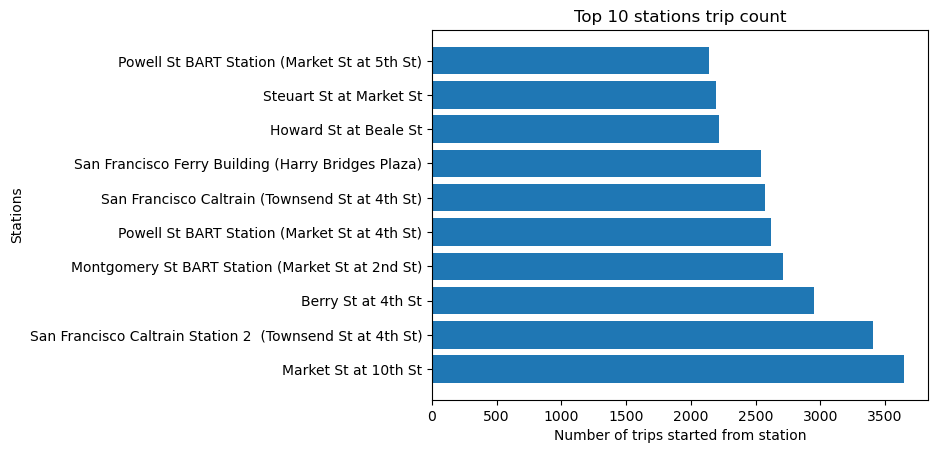

In [48]:
plt.barh(ind, top_10[ind])
plt.title('Top 10 stations trip count');
plt.xlabel('Number of trips started from station')
plt.ylabel('Stations');

**Observation**

***Plotting the top 10 station shows that Market St at 10th St is the most frequent station***

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

- The Latitude and longitude are used to determine the precise area where trip are being made.

- Sarting from the 70s the higher the age the less the duration.

- Male is often the gender who takes the most trips rather than female and other, In addition he is the gender that have the highest duration in overall count.

- The least trip count for the top 10 stations is higher than 2000.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

- The age vs duration has a weak positive correaltion 

## Multivariate Exploration


In [49]:
# Defining ordered day ticks
ticks = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']

### Question  1 :

**How does trip duration for different user type distributed over days of the week ?**

**Visualization**

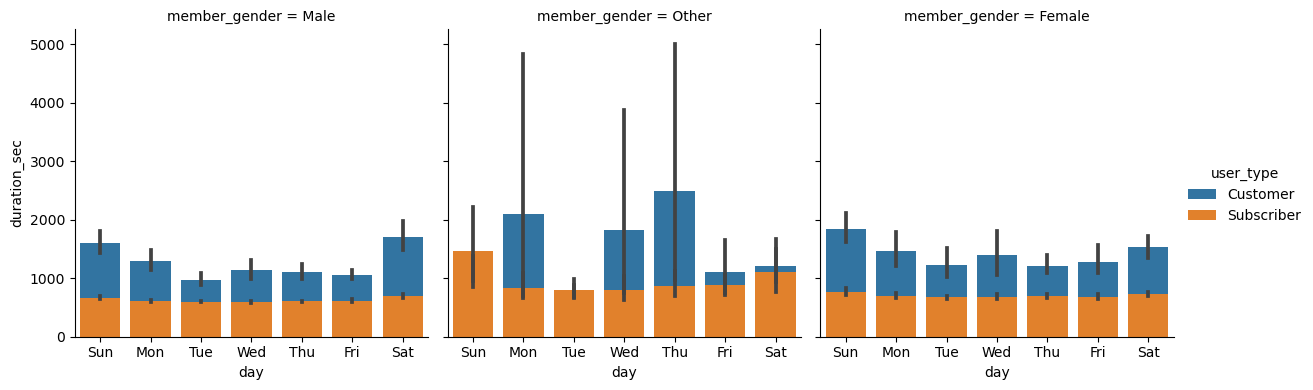

In [50]:
g = sb.FacetGrid(data = df, col = 'member_gender', hue = 'user_type', height = 4 )
g.map(sb.barplot, 'day', 'duration_sec', order = ticks)
g.add_legend();

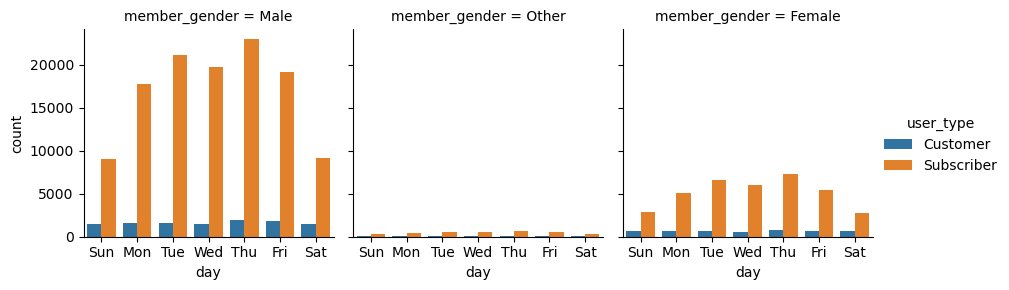

In [51]:
sb.catplot(data=df, x='day', col='member_gender',hue='user_type',kind='count', sharey = True, height = 3, order = ticks);

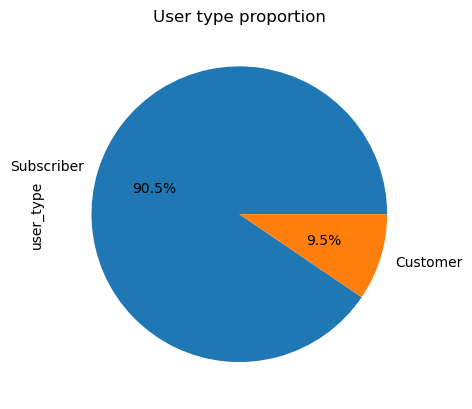

In [52]:
df.user_type.value_counts().plot(kind='pie', y='duration_sec', autopct='%1.1f%%')
plt.title('User type proportion');

**Observations**

***We notice for overall gender plot, subscriber is the most dominant user type across days in terms of duration and count, However it represents more than 90% of the data***

### Question  2 :

**For each user type what is the duration pattern across days ofthe week ?**

**Visualization**

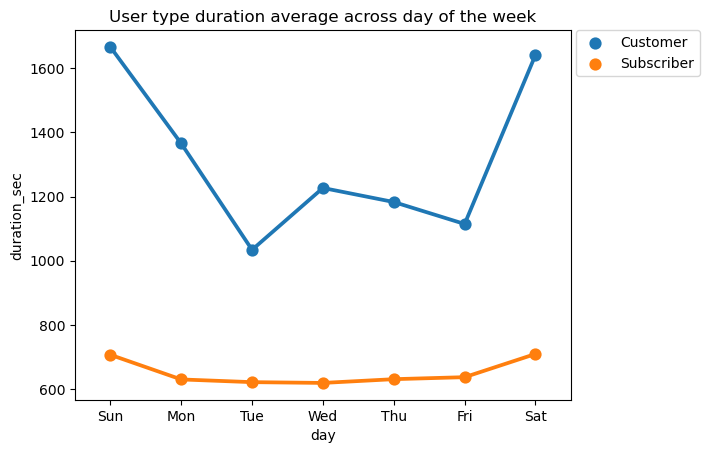

In [53]:
fig, ax = plt.subplots(1,1) 
ax = sb.pointplot(data = df, x = 'day', y = 'duration_sec', hue = 'user_type', order = ticks, ci = None)
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0) #Repositioning the legend
plt.title('User type duration average across day of the week');

**Observations**

**We observe a nearly constant line for sbscribers while a peaky line with ups and downs for customers**

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

- All customers have nearly the same duration average across days of the week.

- Subscribers are more often to take low duration trip but in a consistent way, unlike customers who take trip in an inconsistent way.
### Were there any interesting or surprising interactions between features?


- Most subscribers that takes trips every day are male.

- User types shows a different line shapes interacting with days of the week

## Conclusions

**- Trip duration are related to age, Therefore the higher the age the less the duration, Overall conclusion elderly are representing an important part of participant, This explains that elderly people in california tend to be sportsmen as well as tricenarian.**


**- Subscribers represents more than 90% of participant, They usually take part of trip with less duration comparing to customers.**

**- In weekend trip count decreases what explains that people tend to be busy or have another interesting activity than taking a bike trip.**

**- Thursday is the most active day comparing to the other days with a slight difference.**